# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [4]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\end-to-end-Mental-Health-project\\src\\Mental_Health\\artifacts\\Mental Health Professional Dataset.csv")

In [5]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Mental health affected
0,Female,37,2,4,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4,3,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2,3,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3,5,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4,3,7-8 hours,Moderate,Yes,6,5,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Gender                                 2054 non-null   object
 1   Age                                    2054 non-null   int64 
 2   Work Pressure                          2054 non-null   int64 
 3   Job Satisfaction                       2054 non-null   int64 
 4   Sleep Duration                         2054 non-null   object
 5   Dietary Habits                         2054 non-null   object
 6   Have you ever had suicidal thoughts ?  2054 non-null   object
 7   Work Hours                             2054 non-null   int64 
 8   Financial Stress                       2054 non-null   int64 
 9   Family History of Mental Illness       2054 non-null   object
 10  Mental health affected                 2054 non-null   object
dtypes: int64(5), obje

In [7]:
df.isnull().sum()

Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Mental health affected                   0
dtype: int64

In [8]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [9]:
int_variables =df.select_dtypes(include=['int']).columns.tolist()
int_variables

['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']

In [10]:
obj_variables =df.select_dtypes(include=['object']).columns.tolist()
obj_variables

['Gender',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness',
 'Mental health affected']

In [11]:
for col in int_variables:
    unique_value = df[col].unique()
    print(f"Unique values of {col} are {unique_value}")
    print("-"*50)

Unique values of Age are [37 60 42 44 48 30 56 35 21 57 54 51 18 31 58 47 50 46 38 45 53 49 43 22
 28 36 20 19 33 41 27 52 26 34 59 55 25 40 24 39 23 29 32]
--------------------------------------------------
Unique values of Work Pressure are [2 4 3 1 5]
--------------------------------------------------
Unique values of Job Satisfaction are [4 3 5 2 1]
--------------------------------------------------
Unique values of Work Hours are [ 6  0  1 12  3 11 10  8  7  9  5  2  4]
--------------------------------------------------
Unique values of Financial Stress are [2 4 5 3 1]
--------------------------------------------------


In [12]:
df['Mental health affected'].value_counts()

Mental health affected
No     1851
Yes     203
Name: count, dtype: int64

In [13]:
for ax in obj_variables:
    print(df[ax].unique())

['Female' 'Male']
['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']
['Moderate' 'Unhealthy' 'Healthy']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


# Exploratory Data Analysis

In [14]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Mental health affected'],
      dtype='object')

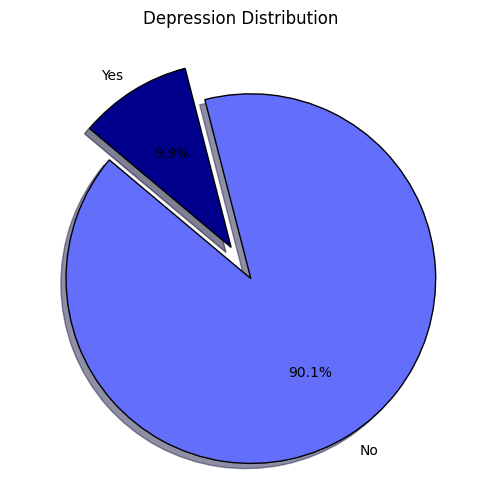

In [15]:
import matplotlib.pyplot as plt

depression_counts = df['Mental health affected'].value_counts()

colors = ['#636efb', '#01008c']

plt.figure(figsize=(6, 6))
plt.pie(depression_counts, 
        labels=depression_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        shadow=True, 
        explode=[0.1] * len(depression_counts),  
        wedgeprops={'edgecolor': 'black'})  

plt.title('Depression Distribution')

plt.show()


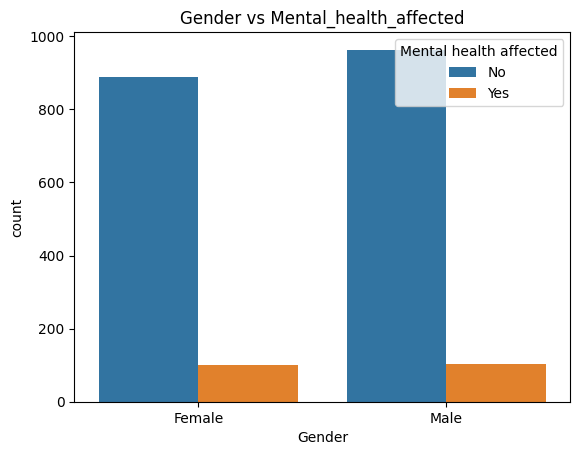

In [16]:
sns.countplot(data=df, x='Gender', hue='Mental health affected')
plt.title('Gender vs Mental_health_affected')
plt.show()

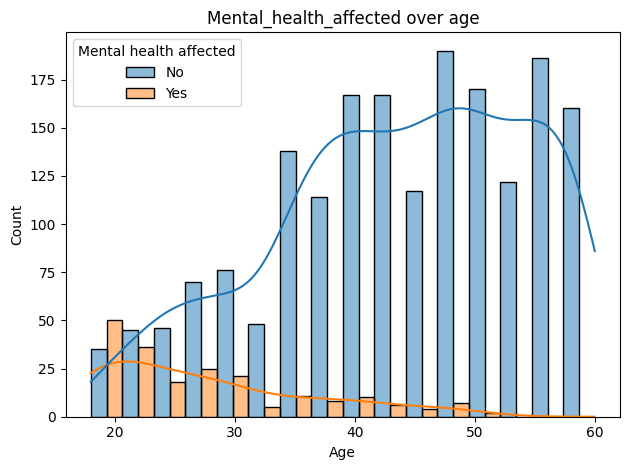

In [17]:
sns.histplot(df, x="Age", hue="Mental health affected", multiple="dodge", kde=True)
plt.title("Mental_health_affected over age")
plt.tight_layout()
plt.show()

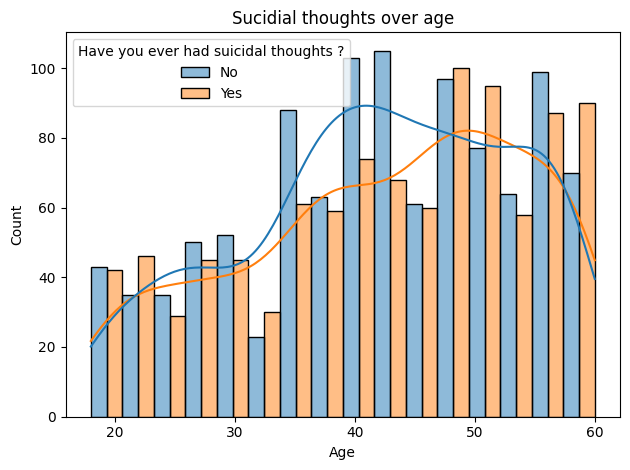

In [18]:
sns.histplot(df, x="Age", hue="Have you ever had suicidal thoughts ?", multiple="dodge", kde=True)
plt.title("Sucidial thoughts over age")
plt.tight_layout()
plt.show()

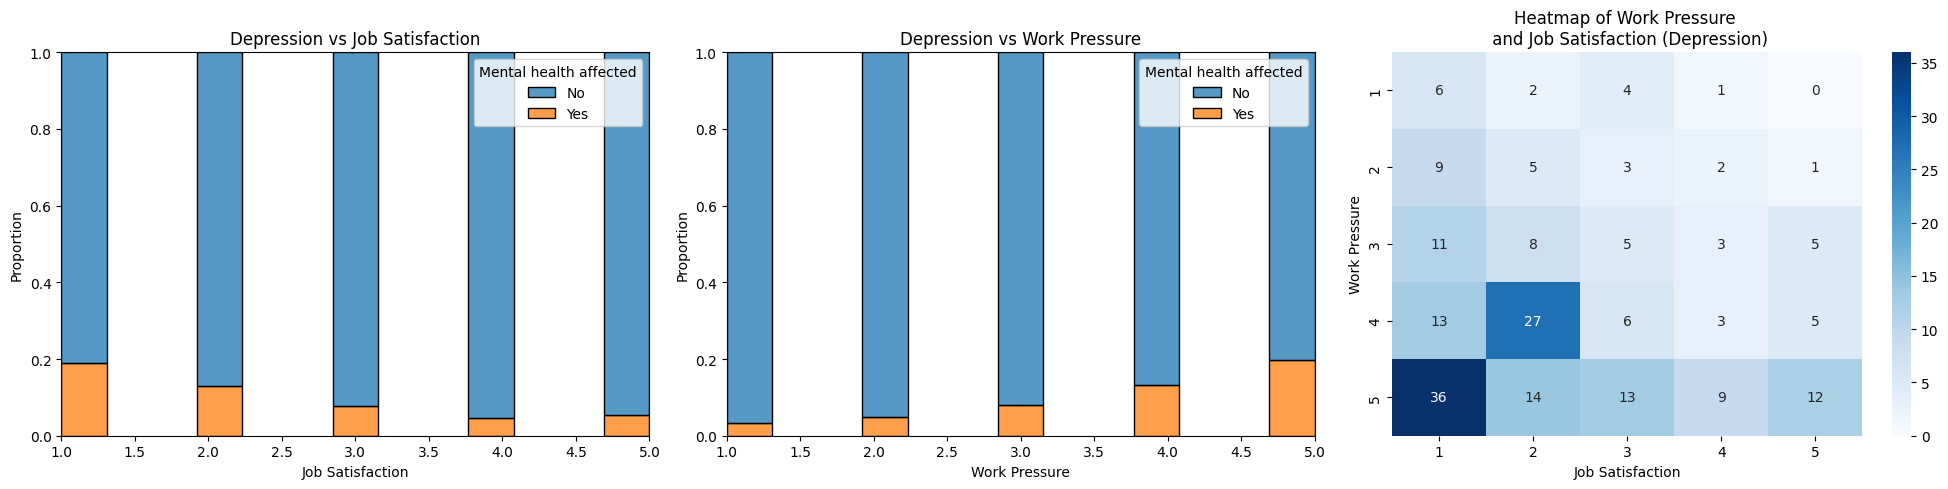

In [19]:

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(df, x="Job Satisfaction", hue="Mental health affected", multiple="fill", ax=ax1)
ax1.set_title("Depression vs Job Satisfaction")
ax1.set_xlabel("Job Satisfaction")
ax1.set_ylabel("Proportion")

sns.histplot(df, x="Work Pressure", hue="Mental health affected", multiple="fill", ax=ax2)
ax2.set_title("Depression vs Work Pressure")
ax2.set_xlabel("Work Pressure")
ax2.set_ylabel("Proportion")

crosstab = pd.crosstab(
    df[df['Mental health affected'] == 'Yes']['Work Pressure'],
    df[df['Mental health affected'] == 'Yes']['Job Satisfaction']
)
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues", ax=ax3)
ax3.set_title("Heatmap of Work Pressure \n and Job Satisfaction (Depression)")
ax3.set_xlabel("Job Satisfaction")
ax3.set_ylabel("Work Pressure")

plt.tight_layout()
plt.show()


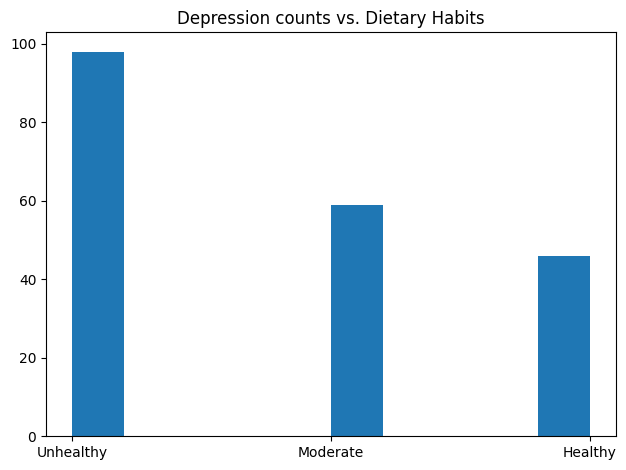

In [20]:
plt.hist(df.loc[df['Mental health affected'] == "Yes"]['Dietary Habits'])
plt.title("Depression counts vs. Dietary Habits")
plt.tight_layout()
plt.show()

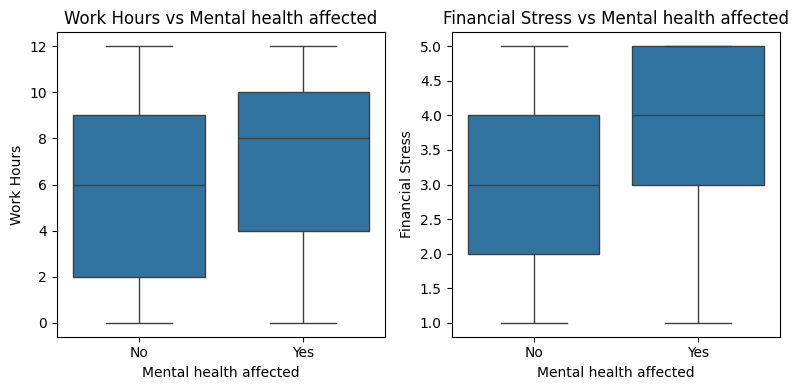

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(data=df, x="Mental health affected", y="Work Hours", ax=axes[0])
axes[0].set_title('Work Hours vs Mental health affected')

sns.boxplot(data=df, x="Mental health affected", y="Financial Stress", ax=axes[1])
axes[1].set_title('Financial Stress vs Mental health affected')

plt.tight_layout()
plt.show()

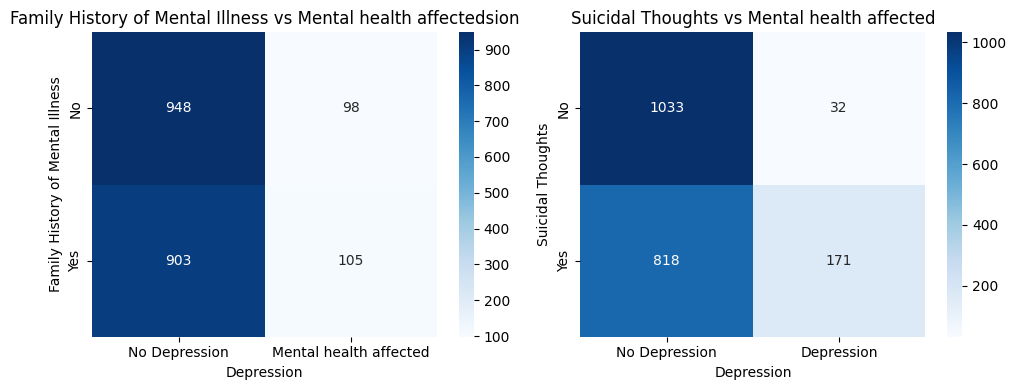

In [22]:

from sklearn.metrics import confusion_matrix
cm_family_history = confusion_matrix(df['Family History of Mental Illness'], df['Mental health affected'])
cm_suicidal_thoughts = confusion_matrix(df['Have you ever had suicidal thoughts ?'], df['Mental health affected'])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_family_history, annot=True, fmt='d', cmap='Blues', xticklabels=["No Depression", "Mental health affected"], 
            yticklabels=["No", "Yes"], ax=axes[0])
axes[0].set_title('Family History of Mental Illness vs Mental health affectedsion')
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Family History of Mental Illness')

sns.heatmap(cm_suicidal_thoughts, annot=True, fmt='d', cmap='Blues', xticklabels=["No Depression", "Depression"], 
            yticklabels=["No", "Yes"], ax=axes[1])
axes[1].set_title('Suicidal Thoughts vs Mental health affected')
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('Suicidal Thoughts')

plt.tight_layout()
plt.show()

# Sum Up EDA

<div style="border: 2px solid #4682B4; padding: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif; font-size: 16px; color: #333;">
  <strong>EDA showed us that depression is dependent mostly on:</strong><br>
  <strong>job-related factors (satisfaction and pressure), lifestyle choices (sleep and diet), and age. Family history has a moderate impact, while the strong link with suicidal thoughts highlights the importance of early intervention and treatment.</strong>
</d
v>


In [23]:
obj_variables

['Gender',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness',
 'Mental health affected']

In [24]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
for col in obj_variables:
    unique_value = df[col].unique()
    print(f"Unique values of {col} are {unique_value}")
    print("-"*50)

Unique values of Gender are ['Female' 'Male']
--------------------------------------------------
Unique values of Sleep Duration are ['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']
--------------------------------------------------
Unique values of Dietary Habits are ['Moderate' 'Unhealthy' 'Healthy']
--------------------------------------------------
Unique values of Have you ever had suicidal thoughts ? are ['No' 'Yes']
--------------------------------------------------
Unique values of Family History of Mental Illness are ['No' 'Yes']
--------------------------------------------------
Unique values of Mental health affected are ['No' 'Yes']
--------------------------------------------------


In [26]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Mental health affected'],
      dtype='object')

In [27]:
le=LabelEncoder()
for cols in obj_variables:
    df[cols]=le.fit_transform(df[cols])



In [28]:
for col in obj_variables:
    unique_value = df[col].unique()
    print(f"Unique values of {col} are {unique_value}")
    print("-"*50)

Unique values of Gender are [0 1]
--------------------------------------------------
Unique values of Sleep Duration are [1 0 3 2]
--------------------------------------------------
Unique values of Dietary Habits are [1 2 0]
--------------------------------------------------
Unique values of Have you ever had suicidal thoughts ? are [0 1]
--------------------------------------------------
Unique values of Family History of Mental Illness are [0 1]
--------------------------------------------------
Unique values of Mental health affected are [0 1]
--------------------------------------------------


In [29]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Mental health affected
0,0,37,2,4,1,1,0,6,2,0,0
1,1,60,4,3,0,2,1,0,4,1,0
2,0,42,2,3,0,1,0,0,2,0,0
3,0,44,3,5,1,0,1,1,2,1,0
4,1,48,4,3,1,1,1,6,5,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Gender                                 2054 non-null   int64
 1   Age                                    2054 non-null   int64
 2   Work Pressure                          2054 non-null   int64
 3   Job Satisfaction                       2054 non-null   int64
 4   Sleep Duration                         2054 non-null   int64
 5   Dietary Habits                         2054 non-null   int64
 6   Have you ever had suicidal thoughts ?  2054 non-null   int64
 7   Work Hours                             2054 non-null   int64
 8   Financial Stress                       2054 non-null   int64
 9   Family History of Mental Illness       2054 non-null   int64
 10  Mental health affected                 2054 non-null   int64
dtypes: int64(11)
memory usage: 176

<Axes: >

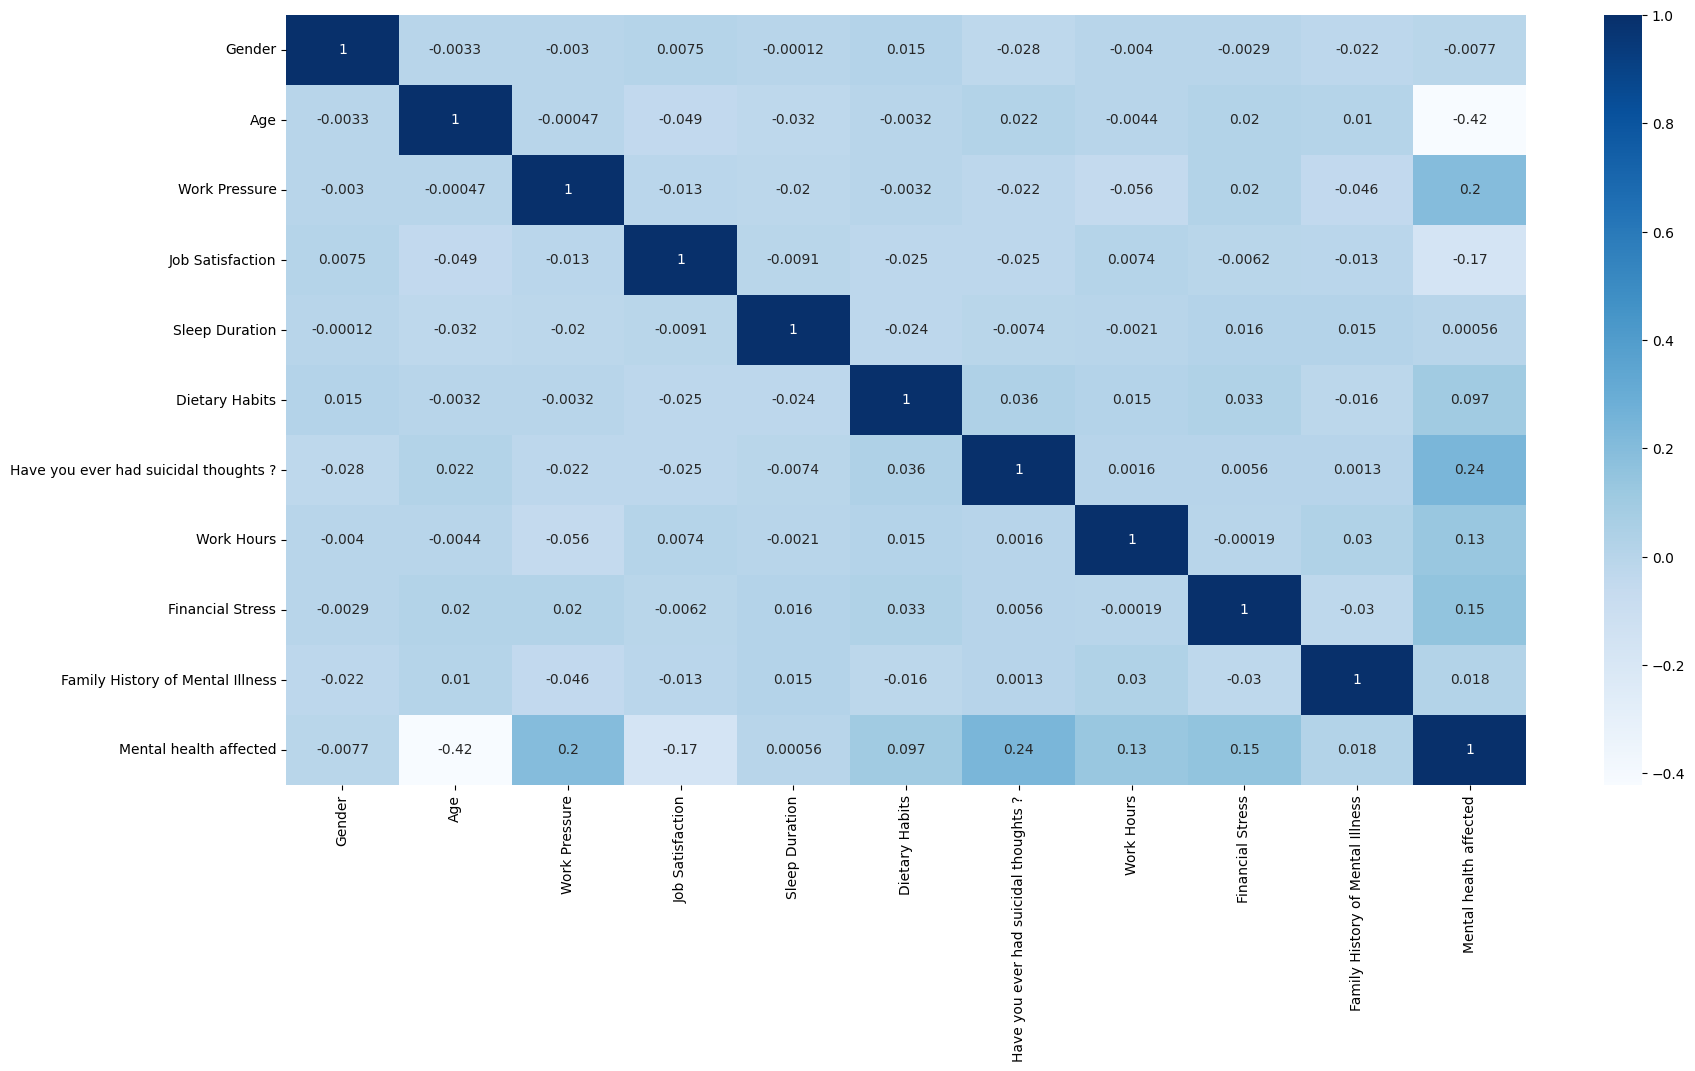

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [32]:
df = df.drop(["Sleep Duration"],axis =1)

In [33]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Mental health affected'],
      dtype='object')

In [34]:
X=df.drop(["Mental health affected"],axis=1)
y=df["Mental health affected"]


# Modeling

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1643, 9)
(411, 9)
(1643,)
(411,)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from imblearn.over_sampling import SMOTE



In [45]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [46]:
print(X_train_resampled.shape)

print(y_train_resampled.shape)


(2954, 9)
(2954,)


In [47]:
models = ["RandomForestClassifier","LogisticRegression"]
for ax in models:
    print(ax)

RandomForestClassifier
LogisticRegression


In [48]:
y_train_resampled.value_counts()

Mental health affected
0    1477
1    1477
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import GridSearchCV

# Random Forest Classifier

In [50]:
rf_model = RandomForestClassifier(class_weight="balanced",criterion="entropy")


In [51]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight':['None','balanced']
}
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['None', 'balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [52]:
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [53]:
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9538


In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")

Random Forest Classifier Accuracy: 0.95


In [56]:
rf_y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       374
           1       0.76      0.59      0.67        37

    accuracy                           0.95       411
   macro avg       0.86      0.79      0.82       411
weighted avg       0.94      0.95      0.94       411



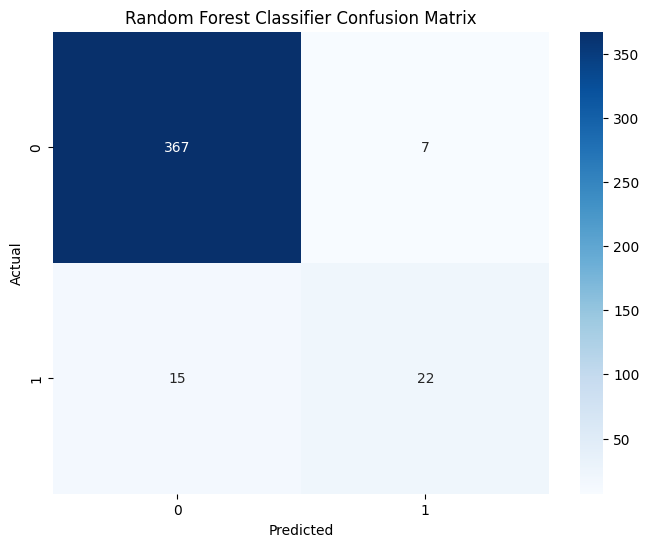

In [58]:
rf_cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))

ROC-AUC: 0.977128197716433


# Logistic Regression

In [60]:
lr_model = LogisticRegression()

In [61]:



param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'] , # L1 for Lasso, L2 for Ridge
    'class_weight':['None','balanced'] 
}
grid_search = GridSearchCV(estimator=lr_model,param_grid=param_grid,cv=5,scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['None', 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [62]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}


In [63]:
best_model = grid_search.best_estimator_
lr_y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9757


In [64]:
lr_y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:

lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
lr_y_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Accuracy: 0.97


In [66]:
lr_y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       374
           1       0.77      0.97      0.86        37

    accuracy                           0.97       411
   macro avg       0.88      0.97      0.92       411
weighted avg       0.98      0.97      0.97       411



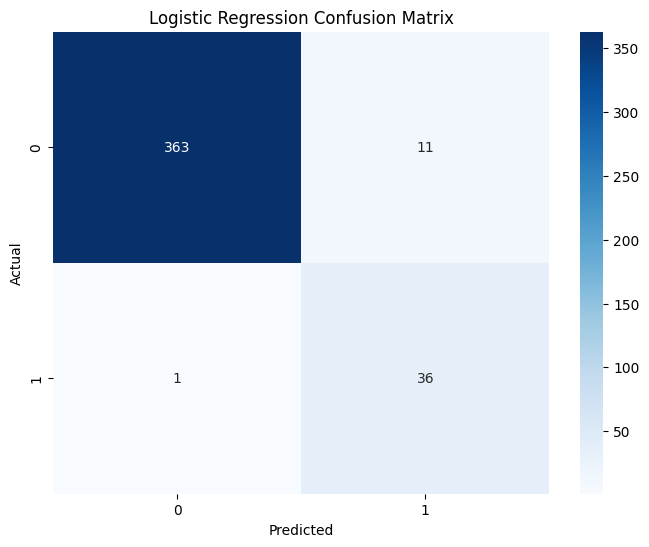

In [68]:
lr_cm = confusion_matrix(y_test, lr_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Support Vector Machine

In [69]:
from sklearn.svm import SVC

In [70]:
svm = SVC()

In [71]:
svm.fit(X_train_resampled,y_train_resampled)
y_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Support Vector Machine Accuracy: {svm_accuracy:.2f}")

Support Vector Machine Accuracy: 0.96


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       374
           1       0.75      0.89      0.81        37

    accuracy                           0.96       411
   macro avg       0.87      0.93      0.90       411
weighted avg       0.97      0.96      0.96       411



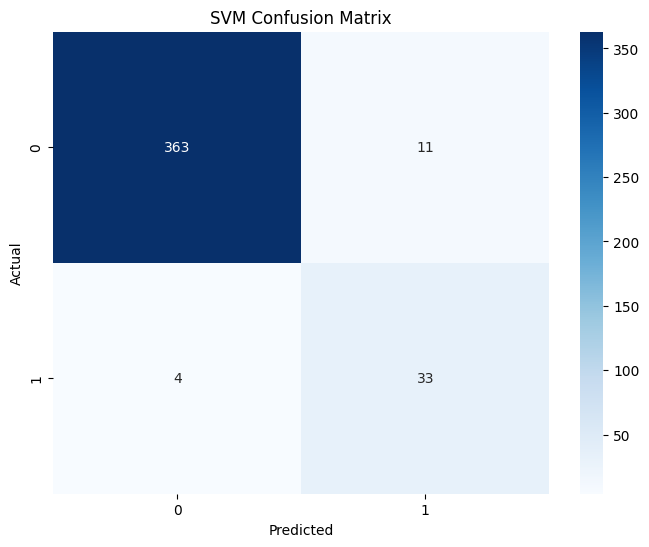

In [73]:
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Conclusion

<div style="border: 2px solid #4682B4; padding: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif; font-size: 16px; color: #333;">

  - The <strong>Logistic Regression</strong> model stands out with the highest accuracy (<strong>0.98</strong>) and a balanced performance across all metrics.<br><br>
  - The <strong>Random Forest Classifier</strong> shows strong accuracy (<strong>0.96</strong>) but struggles with classifying the minority class (<strong>1</strong>), reflected in its lower recall for class <strong>1</strong>.<br><br>
  - The <strong>Support Vector Machine</strong> shows strong accuracy (<strong>0.97</strong>) but struggles with classifying the minority class (<strong>1</strong>), reflected in its lower recall for class <strong>1</strong>.<br><br>
  For deployment, <strong>Logistic Regression</strong> would be the preferred choice due to its higher accuracy and consistency across all metrics.
</div>


## Making Pickle file

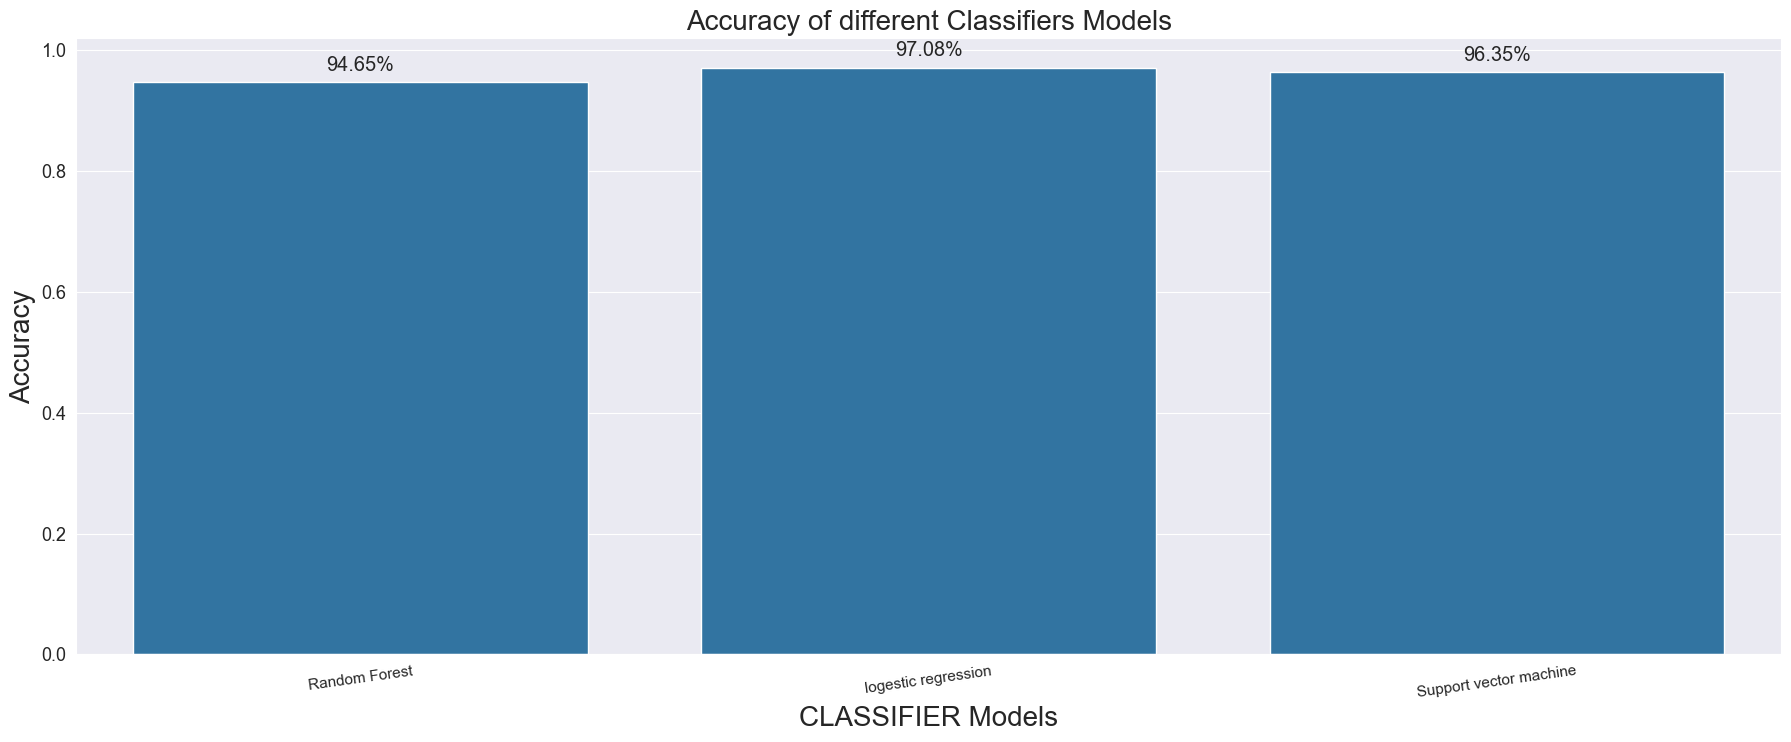

In [74]:
mylist=[]
mylist2=[]
mylist.append(rf_accuracy)
mylist2.append("Random Forest")
mylist.append(lr_accuracy)
mylist2.append("logestic regression")
mylist.append(svm_accuracy)
mylist2.append("Support vector machine")


plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist)
plt.xlabel("CLASSIFIER Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifiers Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate( f'{height:.2%}',(x + width/2, y + height*1.02) , ha='center',fontsize = 'x-large')

plt.show()

In [76]:
import pickle

In [77]:
import pickle

# Define the base directory
base_dir = r"C:\Users\DELL\Desktop\end-to-end-Mental-Health-project\src\Mental_Health\artifacts"

# Save and load the scaler
scaler_path = f"{base_dir}\\scaler.pickle"
pickle.dump(scaler, open(scaler_path, "wb"))
ssc = pickle.load(open(scaler_path, "rb"))

# Save and load the logistic regression model
lr_model_path = f"{base_dir}\\logistic_regression.pkl"
pickle.dump(lr_model, open(lr_model_path, "wb"))
model = pickle.load(open(lr_model_path, "rb"))

# Save and load the random forest model
rf_model_path = f"{base_dir}\\random_forest.pkl"
pickle.dump(rf_model, open(rf_model_path, "wb"))
model = pickle.load(open(rf_model_path, "rb"))

In [70]:
report1 = classification_report(y_test, lr_y_pred, output_dict=True)
report1

{'0': {'precision': 0.9972067039106145,
  'recall': 0.9545454545454546,
  'f1-score': 0.9754098360655737,
  'support': 374.0},
 '1': {'precision': 0.6792452830188679,
  'recall': 0.972972972972973,
  'f1-score': 0.8,
  'support': 37.0},
 'accuracy': 0.9562043795620438,
 'macro avg': {'precision': 0.8382259934647411,
  'recall': 0.9637592137592138,
  'f1-score': 0.887704918032787,
  'support': 411.0},
 'weighted avg': {'precision': 0.9685824397427444,
  'recall': 0.9562043795620438,
  'f1-score': 0.9596186829404492,
  'support': 411.0}}

In [71]:
report2 = classification_report(y_test, rf_y_pred, output_dict=True)
report2

{'0': {'precision': 0.975609756097561,
  'recall': 0.9625668449197861,
  'f1-score': 0.9690444145356663,
  'support': 374.0},
 '1': {'precision': 0.6666666666666666,
  'recall': 0.7567567567567568,
  'f1-score': 0.7088607594936709,
  'support': 37.0},
 'accuracy': 0.9440389294403893,
 'macro avg': {'precision': 0.8211382113821137,
  'recall': 0.8596618008382715,
  'f1-score': 0.8389525870146686,
  'support': 411.0},
 'weighted avg': {'precision': 0.9477973611852907,
  'recall': 0.9440389294403893,
  'f1-score': 0.9456215550793309,
  'support': 411.0}}

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Gender                                 2054 non-null   int64
 1   Age                                    2054 non-null   int64
 2   Work Pressure                          2054 non-null   int64
 3   Job Satisfaction                       2054 non-null   int64
 4   Dietary Habits                         2054 non-null   int64
 5   Have you ever had suicidal thoughts ?  2054 non-null   int64
 6   Work Hours                             2054 non-null   int64
 7   Financial Stress                       2054 non-null   int64
 8   Family History of Mental Illness       2054 non-null   int64
 9   Mental health affected                 2054 non-null   int64
dtypes: int64(10)
memory usage: 160.6 KB


In [73]:
X_test

,Gender,Age,Work Pressure,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness
1111,0,46,1,2,0,0,2,1,1
1169,1,24,5,4,1,0,9,2,1
1799,0,27,2,2,2,0,0,3,0
412,0,35,5,1,1,0,0,1,0
635,1,47,1,1,0,1,10,5,0
...,...,...,...,...,...,...,...,...,...
662,0,39,1,1,1,1,1,1,1
197,0,44,3,3,2,0,3,4,1
1885,0,46,5,4,2,1,9,5,0
224,0,28,5,2,0,0,9,4,0
